# Časové řady

In [1]:
import random

In [2]:
def queue(lmbda=1):
    time = 0
    queueSize = 0
    while True:
        timeDelta = random.expovariate(lmbda)
        time = time + timeDelta
        if random.random() < 0.5:
            queueSize = queueSize + 1
        else:
            queueSize = queueSize - 1
        if queueSize < 0:
            queueSize = 0
        yield time, queueSize

In [3]:
for time, qsize in queue():
    print(time, "\t", qsize)
    if time > 10:
        break

1.8245735348811027 	 1
2.529515921790435 	 2
2.7933713258769215 	 1
3.9083117993437115 	 2
6.321825705515853 	 1
7.563701902679786 	 2
8.018442078631871 	 1
8.513928234625652 	 0
9.757996639586887 	 1
9.776543795382192 	 0
10.15603623703146 	 1


> **Příklad**
>
> Vygenerujte 100 prvků datové posloupnosti

In [4]:
dataset = []
dataset[-3:]

[]

> **Řešení**
> 

In [5]:
dataset = [{"time": time, "qsize": qsize} for i, (time, qsize) in zip(range(100), queue())]
dataset[-3:]

[{'time': 118.09525498136442, 'qsize': 10},
 {'time': 119.14485511644072, 'qsize': 11},
 {'time': 119.19679700678066, 'qsize': 12}]

> **Příklad**
>
> Napište funkci `limit` omezující délku výstupu generátoru

In [ ]:
def limit(g, count=100):
    ##
    ##
    ##
    pass

list(limit(queue(), 10))

> **Řešení**
> 

In [7]:
def limit(g, count=100):
    for i, gi in zip(range(count), g):
        yield gi
        
list(limit(queue(), 10))

[(0.7862421340923453, 0),
 (2.3358641092654278, 0),
 (2.4738219198725337, 0),
 (3.6750822650363, 0),
 (5.460599527175908, 0),
 (6.626286861406807, 1),
 (8.419941446314217, 2),
 (12.2458952102827, 3),
 (12.794762904473643, 4),
 (13.717909882873338, 5)]

> **Příklad**
>
> Napište funkci, která převede tuple na dict, tj. čas a hodnotu atributu na `{"time": time, "qsize": qsize}`

In [ ]:
def makedict(g):
    #
    #
    pass

list(makedict(limit(queue(), 10)))

> **Řešení**
> 

In [8]:
def makedict(g):
    for time, qsize in g:
        yield {"time": time, "qsize": qsize}
               
list(makedict(limit(queue(), 10)))

[{'time': 0.5374125363070125, 'qsize': 1},
 {'time': 1.8421095072406333, 'qsize': 2},
 {'time': 2.529301620204528, 'qsize': 3},
 {'time': 3.7815515579081236, 'qsize': 4},
 {'time': 4.515790271899385, 'qsize': 5},
 {'time': 4.6108449244534855, 'qsize': 4},
 {'time': 5.647407295461288, 'qsize': 3},
 {'time': 7.218559323343246, 'qsize': 2},
 {'time': 8.952961504827842, 'qsize': 1},
 {'time': 9.189598069425315, 'qsize': 2}]

> **Příklad**
>
> Určete průměrnou délku fronty (hodnotu atributu)

In [ ]:
def avg(qdata):
    suma = 0
    #
    #
    #
    #
    #
    #
    return suma

avg(makedict(limit(queue())))

> **Řešení**
> 

In [9]:
def avg(qdata):
    suma = 0
    lasttime = 0
    for item in qdata:
        time = item["time"]
        qsize = item["qsize"]
        suma = suma + (time - lasttime) * qsize
        lasttime = time
    return suma / lasttime

avg(makedict(limit(queue())))

4.33310413369673

> **Příklad**
>
> Napište funkci, která doplní dict o aktuální průměr

In [ ]:
def avgflow(g):
    #
    #
    #
    #
    #
    #
    
sequence = avgflow(makedict(queue()))
for i, item in zip(range(10000), sequence):
    continue
print(item)

> **Řešení**
> 

In [10]:
def avgflow(g):
    suma = 0
    lasttime = 0
    for item in g:
        time = item["time"]
        qsize = item["qsize"]
        suma = suma + (time - lasttime) * qsize
        lasttime = time
        yield {**item, "avg": suma / lasttime}
    
sequence = avgflow(makedict(queue()))
for i, item in zip(range(10000), sequence):
    continue
print(item)

{'time': 10074.101965720958, 'qsize': 28, 'avg': 37.066044772445174}


10000


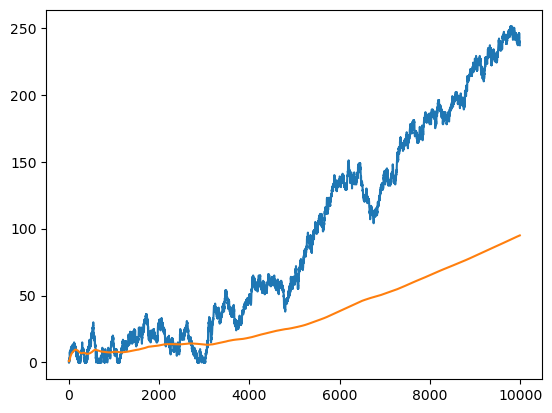

In [18]:
import matplotlib.pyplot as plt

sequence = limit(avgflow(makedict(queue())), 10000)
sequence = list(sequence)
times = [item["time"] for item in sequence]
avgs = [item["avg"] for item in sequence]
vals = [item["qsize"] for item in sequence]
plt.plot(times, vals)
plt.plot(times, avgs)
print(len(times))

> **Příklad**
>
> Určete "plovoucí" průměrnou délku fronty

> **Řešení**
> 

In [16]:
def avgwindow(g, size=100):
    windowItems = []
    lastitem = {"time": 0, "qsize": 0}
    for item in g:
        time = item["time"]
        
        if len(windowItems) > 0:
            while (windowItems[0]["time"] + size < time):
                lastitem = windowItems[0]
                windowItems = windowItems[1:]
                if len(windowItems) == 0:
                    break
        
        windowItems.append(item)
        suma = 0
        previtem = lastitem
        for witem in windowItems:
            prevtime = previtem["time"]
            prevvalue = previtem["qsize"]
            suma = suma + (witem["time"] - prevtime) * prevvalue
            previtem = witem
            
        yield {**item, "avgf": suma / (previtem["time"] - lastitem["time"])}

sequence = avgwindow(avgflow(makedict(queue())))
for i, item in zip(range(10000), sequence):
    continue
print(item)

{'time': 10093.939756263064, 'qsize': 86, 'avg': 50.56967535394116, 'avgf': 87.12499753299463}


10000


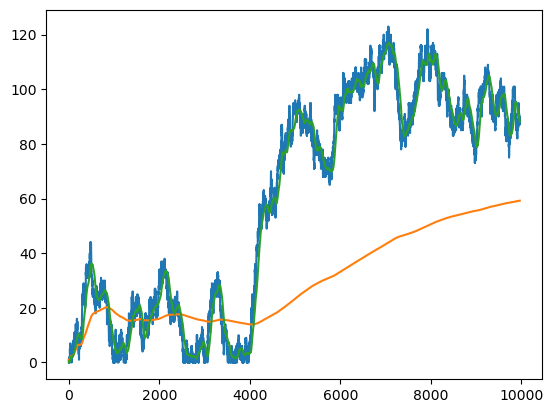

In [20]:
import matplotlib.pyplot as plt

sequence = limit(avgwindow(avgflow(makedict(queue()))), 10000)
sequence = list(sequence)
times = [item["time"] for item in sequence]
avgs = [item["avg"] for item in sequence]
avgfs = [item["avgf"] for item in sequence]
vals = [item["qsize"] for item in sequence]
plt.plot(times, vals)
plt.plot(times, avgs)
plt.plot(times, avgfs)
print(len(times))